In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [9]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [12]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [15]:
model=Sequential()
model.add(Input(shape=(784)))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 100)               25100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [28]:
H=model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0283 - acc: 0.9928 - val_loss: 0.1323 - val_acc: 0.9759
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0245 - acc: 0.9934 - val_loss: 0.1404 - val_acc: 0.9793
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0175 - acc: 0.9951 - val_loss: 0.1400 - val_acc: 0.9759
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0168 - acc: 0.9954 - val_loss: 0.1589 - val_acc: 0.9734
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0238 - acc: 0.9937 - val_loss: 0.1450 - val_acc: 0.9789
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0243 - acc: 0.9937 - val_loss: 0.1566 - val_acc: 0.9744
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0164 - acc: 0.9957 - val_loss: 0.1343 - val_acc: 0.9785
Epoch 8/10
469/469 [==============================] - 12s 26ms

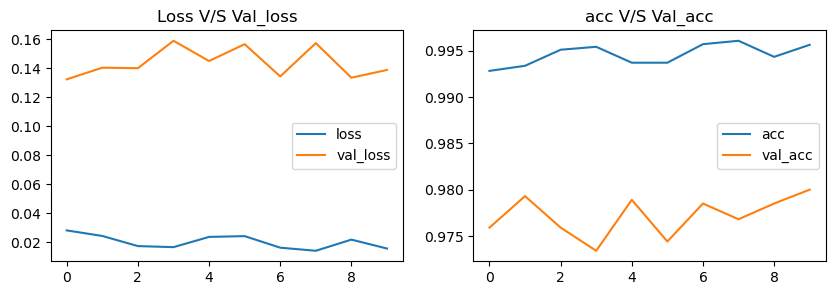

In [32]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(H.epoch,H.history['loss'],label='loss')
plt.plot(H.epoch,H.history['val_loss'],label='val_loss')
plt.title("Loss V/S Val_loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(H.epoch,H.history['acc'],label='acc')
plt.plot(H.epoch,H.history['val_acc'],label='val_acc')
plt.title("acc V/S Val_acc")
plt.legend()